<a href="https://colab.research.google.com/github/kamilpawlowski-git/python_machine_learning_project/blob/main/baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import google.colab
import pandas as pd
import sklearn.metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Drive mounting

In [ ]:
google.colab.drive.mount('/content/drive/')

path_to_folder = "/content/drive/MyDrive/analab/project"

%cd $path_to_folder

! ls

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/analab/project
baseline.ipynb	dataset.csv  queries.csv


# Data loading

Dataset entries are described [here](https://www.kaggle.com/datasets/blastchar/telco-customer-churn).

In [ ]:
dataset = pd.read_csv('./dataset.csv')
display(dataset.head(5))

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0.0,Yes,Yes,72.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.20,1787.35,0
1,Male,0.0,No,No,40.0,Yes,No,Fiber optic,No,Yes,No,Yes,No,Yes,One year,Yes,Credit card (automatic),89.60,3488.15,0
2,Male,0.0,Yes,Yes,40.0,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Mailed check,60.30,2448.5,0
3,Male,0.0,Yes,Yes,58.0,Yes,Yes,Fiber optic,No,No,Yes,Yes,No,Yes,Two year,No,Bank transfer (automatic),94.35,5563.65,0
4,Male,0.0,Yes,Yes,44.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),20.00,860.85,0


In [ ]:
queries = pd.read_csv('./queries.csv')
display(queries.head(5))

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,NaN,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
1,Male,0.0,Yes,Yes,13.0,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45
2,Male,0.0,No,Yes,71.0,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7382.25
3,Female,0.0,No,No,30.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),55.30,1530.6
4,Female,1.0,Yes,No,71.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95


# Pre-processing

## Code

## NaN value removal

### Check how many values there are in each column

In [ ]:
print("Number of NaN values in each column: ")
print(dataset.isnull().sum())

Number of NaN values in each column: 
gender              26
SeniorCitizen       29
Partner             27
Dependents          27
tenure              36
PhoneService        23
MultipleLines       22
InternetService     27
OnlineSecurity      37
OnlineBackup        30
DeviceProtection    29
TechSupport         29
StreamingTV         27
StreamingMovies     24
Contract            27
PaperlessBilling    34
PaymentMethod       33
MonthlyCharges      40
TotalCharges        23
Churn                0
dtype: int64


In [ ]:
print(queries.isnull().sum())

gender               9
SeniorCitizen        5
Partner              7
Dependents          11
tenure               8
PhoneService         6
MultipleLines       11
InternetService      7
OnlineSecurity       6
OnlineBackup        13
DeviceProtection     7
TechSupport          9
StreamingTV          6
StreamingMovies      9
Contract             7
PaperlessBilling    10
PaymentMethod        7
MonthlyCharges       8
TotalCharges        10
dtype: int64


### Fill NaN values (categorical - most popular, numerical - median)

In [ ]:
# categorical
dataset['gender'].fillna(dataset['gender'].mode()[0], inplace=True)
dataset['SeniorCitizen'].fillna(dataset['SeniorCitizen'].mode()[0], inplace=True)
dataset['Partner'].fillna(dataset['Partner'].mode()[0], inplace=True)
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0], inplace=True)
dataset['tenure'].fillna(dataset['tenure'].median(), inplace=True)
dataset['PhoneService'].fillna(dataset['PhoneService'].mode()[0], inplace=True)
dataset['MultipleLines'].fillna(dataset['MultipleLines'].mode()[0], inplace=True)
dataset['InternetService'].fillna(dataset['InternetService'].mode()[0], inplace=True)
dataset['OnlineSecurity'].fillna(dataset['OnlineSecurity'].mode()[0], inplace=True)
dataset['OnlineBackup'].fillna(dataset['OnlineBackup'].mode()[0], inplace=True)
dataset['DeviceProtection'].fillna(dataset['DeviceProtection'].mode()[0], inplace=True)
dataset['TechSupport'].fillna(dataset['TechSupport'].mode()[0], inplace=True)
dataset['StreamingTV'].fillna(dataset['StreamingTV'].mode()[0], inplace=True)
dataset['StreamingMovies'].fillna(dataset['StreamingMovies'].mode()[0], inplace=True)
dataset['Contract'].fillna(dataset['Contract'].mode()[0], inplace=True)
dataset['PaperlessBilling'].fillna(dataset['PaperlessBilling'].mode()[0], inplace=True)
dataset['PaymentMethod'].fillna(dataset['PaymentMethod'].mode()[0], inplace=True)

# There were data that were not numerical therefore firstly is was necessary to convert them
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')

# numeric
dataset['TotalCharges'].fillna(dataset['TotalCharges'].median(), inplace=True)
dataset['MonthlyCharges'].fillna(dataset['MonthlyCharges'].median(), inplace=True)

# Your code should end here

<ipython-input-27-2342522476>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['gender'].fillna(dataset['gender'].mode()[0], inplace=True)
<ipython-input-27-2342522476>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [ ]:
# categorical
queries['gender'].fillna(queries['gender'].mode()[0], inplace=True)
queries['SeniorCitizen'].fillna(queries['SeniorCitizen'].mode()[0], inplace=True)
queries['Partner'].fillna(queries['Partner'].mode()[0], inplace=True)
queries['Dependents'].fillna(queries['Dependents'].mode()[0], inplace=True)
queries['tenure'].fillna(queries['tenure'].median(), inplace=True)
queries['PhoneService'].fillna(queries['PhoneService'].mode()[0], inplace=True)
queries['MultipleLines'].fillna(queries['MultipleLines'].mode()[0], inplace=True)
queries['InternetService'].fillna(queries['InternetService'].mode()[0], inplace=True)
queries['OnlineSecurity'].fillna(queries['OnlineSecurity'].mode()[0], inplace=True)
queries['OnlineBackup'].fillna(queries['OnlineBackup'].mode()[0], inplace=True)
queries['DeviceProtection'].fillna(queries['DeviceProtection'].mode()[0], inplace=True)
queries['TechSupport'].fillna(queries['TechSupport'].mode()[0], inplace=True)
queries['StreamingTV'].fillna(queries['StreamingTV'].mode()[0], inplace=True)
queries['StreamingMovies'].fillna(queries['StreamingMovies'].mode()[0], inplace=True)
queries['Contract'].fillna(queries['Contract'].mode()[0], inplace=True)
queries['PaperlessBilling'].fillna(queries['PaperlessBilling'].mode()[0], inplace=True)
queries['PaymentMethod'].fillna(queries['PaymentMethod'].mode()[0], inplace=True)

# There were data that were not numerical therefore firstly is was necessary to convert them
queries['TotalCharges'] = pd.to_numeric(queries['TotalCharges'], errors='coerce')

# numeric
queries['TotalCharges'].fillna(queries['TotalCharges'].median(), inplace=True)
queries['MonthlyCharges'].fillna(queries['MonthlyCharges'].median(), inplace=True)

# Your code should end here

<ipython-input-99-1360546814>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-99-1360546814>:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col]

Non-numeric data coding.

There are many non-numeric data in the dataset so:
- When there are just 2 different values, they will be mapped to values "0" or "1".

- When there are more than 2 different values in a particular column, those values will be split by One-Hot Encoding to as many new columns as there are different values.

### Check how many NaN values are in each column now.

In [ ]:
print("Number of NaN values in each column: ")
print(dataset.isnull().sum())

Number of NaN values in each column: 
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
print(queries.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


### Check how many unique values there are in each column

In [ ]:
print("Unique values there are in each column: ")
print(dataset.nunique())

Unique values there are in each column: 
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1497
TotalCharges        5283
Churn                  2
dtype: int64


In [ ]:
print(queries.nunique())

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges       814
TotalCharges        1360
dtype: int64


### Check which of them are numeric/non-numeric

In [ ]:
print(dataset.dtypes)

gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object


### Make all non-numeric data numeric.

In [ ]:
dataset['gender'] = dataset['gender'].map({'Female': 0, 'Male': 1})
dataset['Partner'] = dataset['Partner'].map({'No': 0, 'Yes': 1})
dataset['Dependents'] = dataset['Dependents'].map({'No': 0, 'Yes': 1})
dataset['PhoneService'] = dataset['PhoneService'].map({'No': 0, 'Yes': 1})
dataset['PaperlessBilling'] = dataset['PaperlessBilling'].map({'No': 0, 'Yes': 1})

dataset = pd.get_dummies(dataset, columns=['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'])


In [ ]:
queries['gender'] = queries['gender'].map({'Female': 0, 'Male': 1})
queries['Partner'] = queries['Partner'].map({'No': 0, 'Yes': 1})
queries['Dependents'] = queries['Dependents'].map({'No': 0, 'Yes': 1})
queries['PhoneService'] = queries['PhoneService'].map({'No': 0, 'Yes': 1})
queries['PaperlessBilling'] = queries['PaperlessBilling'].map({'No': 0, 'Yes': 1})

queries = pd.get_dummies(queries, columns=['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'])

### Check again whether we transformed non-numeric data to numeric correctly

In [ ]:
print(dataset.dtypes)

gender                                       int64
SeniorCitizen                              float64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
MultipleLines_No                              bool
MultipleLines_No phone service                bool
MultipleLines_Yes                             bool
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No                            bool
OnlineSecurity_No                             bool
OnlineSecurity_No internet service            bool
OnlineSecurity_Yes                            bool
OnlineBackup_No                

## Report

Write down what you tried in this section. Include your observations, hypothesis, things you are not sure about, ideas for experiments that could be worth trying. You are encouraged to use graphs/tables/pieces of code. You can create new code and text cells. Take a look [here](https://www.markdownguide.org/cheat-sheet/) to improve the quality of your report.

Things to consider in this section:
- NaN values removal
- Non-numeric data coding

# Visualization

## Code

### Create **correlation matrix** to see what which data are correlated the most and the least with churn and between eachother

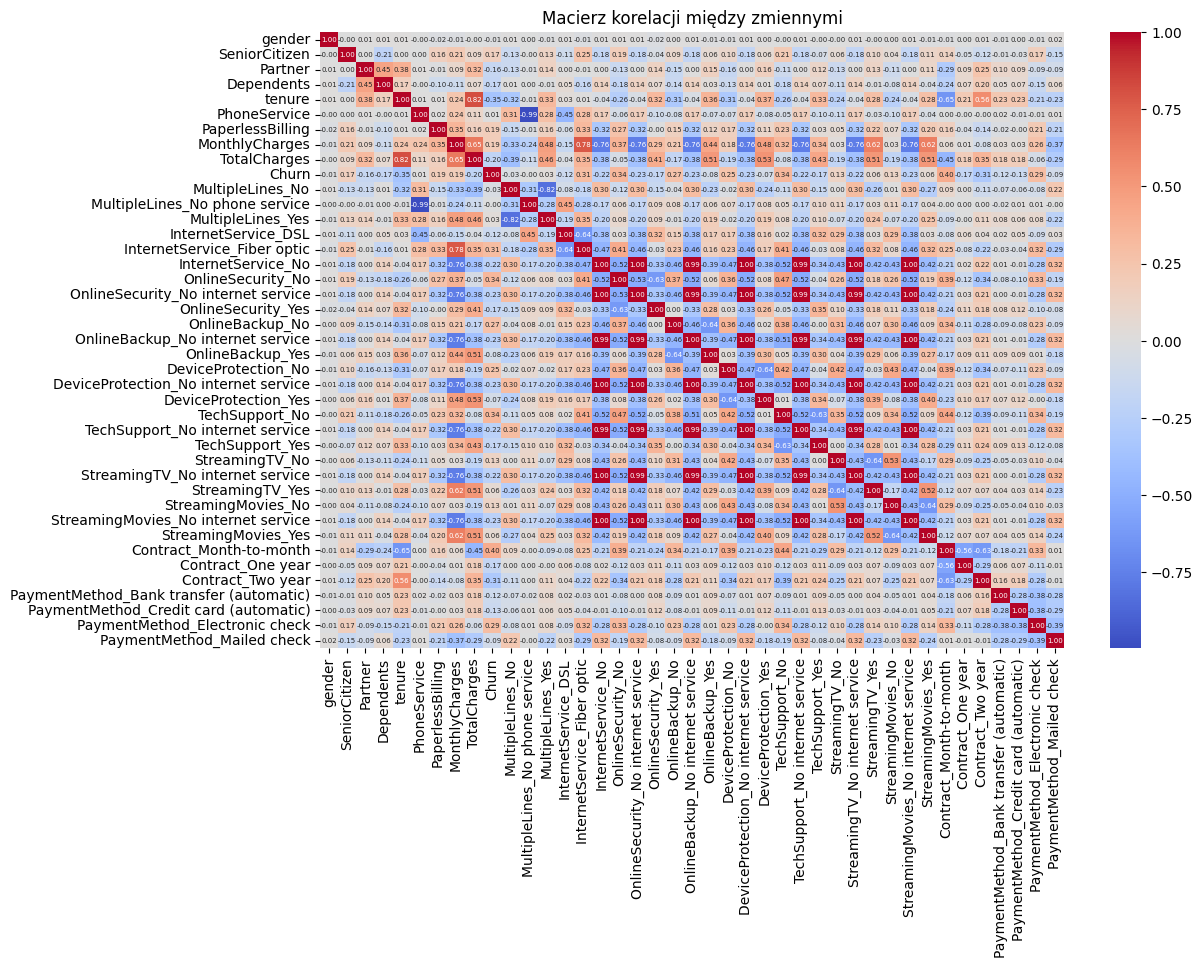

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 5})
plt.title('Macierz korelacji między zmiennymi')
plt.show()

We can see that the most positively correlated columns with column 'Churn' are:
*   Contract_Month-to-month -     0.40
*   OnlineSecurity_No -           0.34
*   TechSupport_No -              0.34
*   InternetService_Fiber Optic - 0.31
*   OnlineBackup_No -             0.27
*   DeviceProtection_No -         0.25





Comparison between contracts

<Figure size 800x600 with 0 Axes>

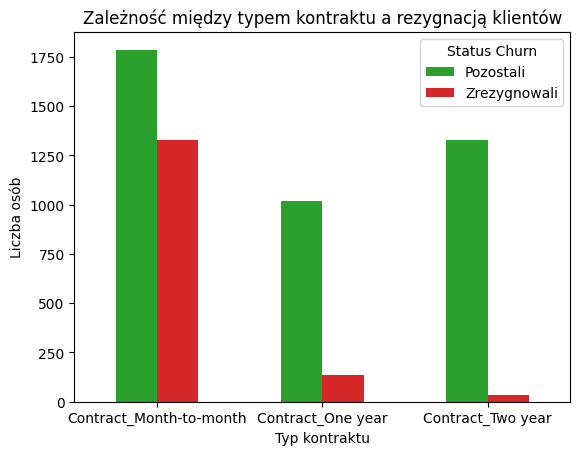

In [ ]:
df = pd.DataFrame(dataset)

# Liczenie liczby osób, które zrezygnowały lub zostały dla każdego kontraktu
contract_types = ["Contract_Month-to-month", "Contract_One year", "Contract_Two year"]
churn_counts = {contract: df[df[contract] == True]["Churn"].value_counts() for contract in contract_types}

# Konwersja do DataFrame dla wykresu
df_plot = pd.DataFrame(churn_counts).T

# Tworzenie wykresu
plt.figure(figsize=(8, 6))
df_plot.plot(kind="bar", stacked=False, color=["#2ca02c", "#d62728"])  # Zielony dla "Pozostali", Czerwony dla "Zrezygnowali"

plt.xlabel("Typ kontraktu")
plt.ylabel("Liczba osób")
plt.title("Zależność między typem kontraktu a rezygnacją klientów")
plt.legend(title="Status Churn", labels=["Pozostali", "Zrezygnowali"])
plt.xticks(rotation=0)

plt.show()

In [ ]:
# What percentage of people left on a particular contract
month_to_month_percentage = (churn_counts["Contract_Month-to-month"][1] / (churn_counts["Contract_Month-to-month"][0] + churn_counts["Contract_Month-to-month"][1]))
print("Month-to-month contract:", round(month_to_month_percentage*100, 2), "%")

one_year_percentage = (churn_counts["Contract_One year"][1] / (churn_counts["Contract_One year"][0] + churn_counts["Contract_One year"][1]))
print("One year contract:", round(one_year_percentage*100, 2), "%")

two_year_percentage = (churn_counts["Contract_Two year"][1] / (churn_counts["Contract_Two year"][0] + churn_counts["Contract_Two year"][1]))
print("Two year contract:", round(two_year_percentage*100, 2), "%")

Month-to-month contract: 42.63 %
One year contract: 11.69 %
Two year contract: 2.57 %


Faktycznie widzimy, że dla typu kontraktu month-to-month rezygnacja jest największa i wynosi około **42,6%**

Comparison between online security

<Figure size 800x600 with 0 Axes>

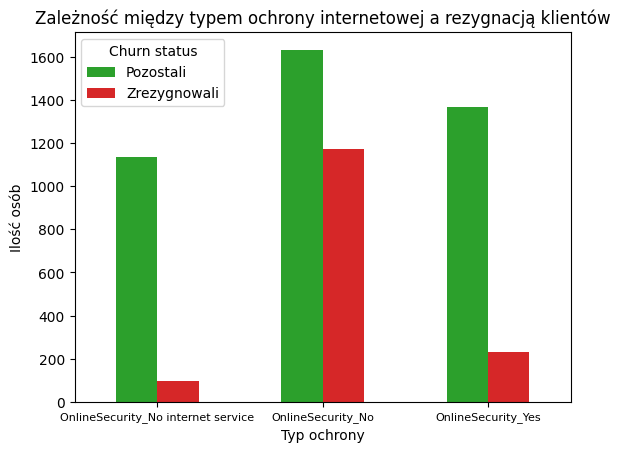

In [ ]:
security_types = ['OnlineSecurity_No internet service', 'OnlineSecurity_No', 'OnlineSecurity_Yes']
security_counts = {security: df[df[security]==True]["Churn"].value_counts() for security in security_types}

# Konwersja danych
security_plot = pd.DataFrame(security_counts).T

# Tworzenie wykresu
plt.figure(figsize=(8, 6))
security_plot.plot(kind='bar', stacked=False, color=["#2ca02c", "#d62728"])

plt.xlabel("Typ ochrony")
plt.ylabel("Ilość osób")
plt.title("Zależność między typem ochrony internetowej a rezygnacją klientów")
plt.legend(title="Churn status", labels=["Pozostali", "Zrezygnowali"], loc='upper left')
plt.xticks(rotation=0, fontsize=8)

plt.show()

In [ ]:
# What percentage of people left on a particular security program
os_no_interet_service = (security_counts['OnlineSecurity_No internet service'][1] / (security_counts['OnlineSecurity_No internet service'][1] + security_counts['OnlineSecurity_No internet service'][0]))
print("No internet service:", round(os_no_interet_service*100, 2), "%")

os_no = (security_counts['OnlineSecurity_No'][1] / (security_counts['OnlineSecurity_No'][1] + security_counts['OnlineSecurity_No'][0]))
print("NO online security:", round(os_no*100, 2), "%")

os_yes = (security_counts['OnlineSecurity_Yes'][1] / (security_counts['OnlineSecurity_Yes'][1] + security_counts['OnlineSecurity_Yes'][0]))
print("YES online security:", round(os_yes*100, 2), "%")

No internet service: 7.73 %
NO online security: 41.82 %
YES online security: 14.33 %


Tu również widzimy, że przy braku ochrony telefonu rezygnuje aż **41,8%** klientów

Comparsion between internet service providers

<Figure size 800x600 with 0 Axes>

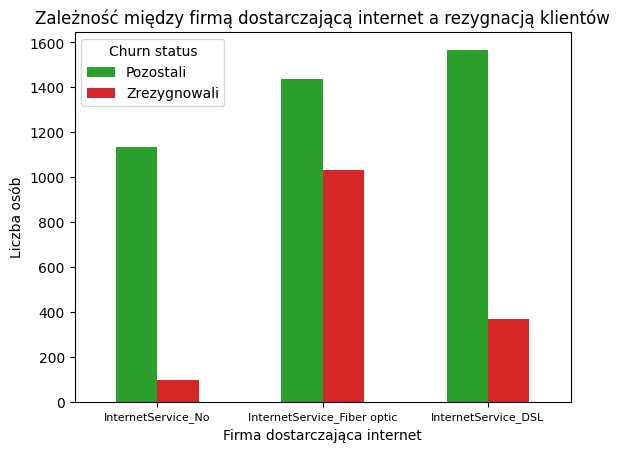

In [ ]:
provider_companies = ['InternetService_No', "InternetService_Fiber optic", "InternetService_DSL"]
provider_counts = {provider: df[df[provider]==True]['Churn'].value_counts() for provider in provider_companies}

#konwersja danych
provider_plot = pd.DataFrame(provider_counts).T

# tworzenie wykresu
plt.figure(figsize=(8, 6))
provider_plot.plot(kind='bar', stacked=False, color=["#2ca02c", "#d62728"])

plt.xlabel("Firma dostarczająca internet")
plt.ylabel("Liczba osób")
plt.title("Zależność między firmą dostarczającą internet a rezygnacją klientów")
plt.legend(title='Churn status', labels=["Pozostali", "Zrezygnowali"])
plt.xticks(rotation=0, fontsize=8)
plt.show()

Tenure - Fiber Optic

<ipython-input-39-891022472>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(data=dataset[dataset['InternetService_Fiber optic'] == 1][dataset['Churn'] == 0],
<ipython-input-39-891022472>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(data=dataset[dataset['InternetService_Fiber optic'] == 1][dataset['Churn'] == 1],


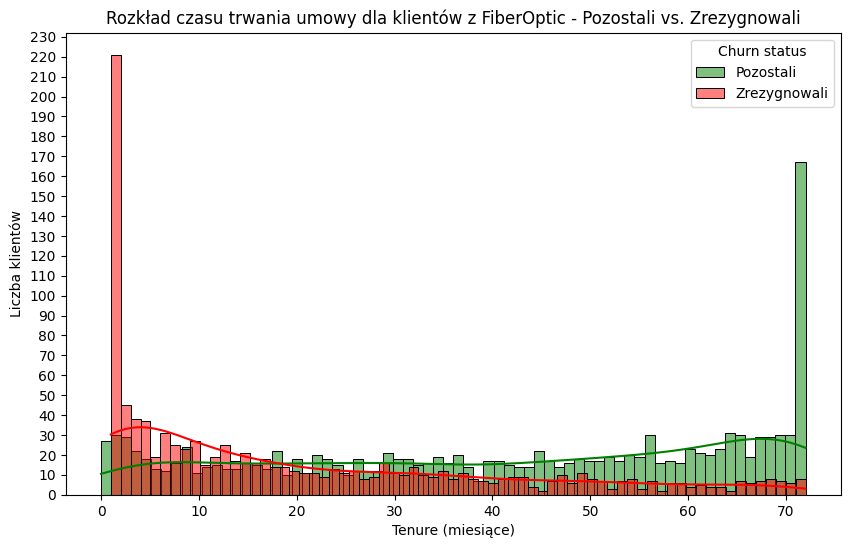

In [ ]:
# Histogram FiberOptic
plt.figure(figsize=(10, 6))

# Histogram dla klientów z FiberOptic, którzy pozostali
sns.histplot(data=dataset[dataset['InternetService_Fiber optic'] == 1][dataset['Churn'] == 0],
             x='tenure', bins=70, kde=True, color='green', label='Pozostali')

# Histogram dla klientów z FiberOptic, którzy zrezygnowali
sns.histplot(data=dataset[dataset['InternetService_Fiber optic'] == 1][dataset['Churn'] == 1],
             x='tenure', bins=70, kde=True, color='red', label='Zrezygnowali')

plt.xlabel('Tenure (miesiące)')
plt.ylabel('Liczba klientów')
plt.title('Rozkład czasu trwania umowy dla klientów z FiberOptic - Pozostali vs. Zrezygnowali')
plt.legend(title="Churn status")
plt.yticks(np.arange(0, 240, step=10))
plt.show()

Najwięcej klientów rezygnuje zaraz na początku umowy

Tenure - DSL

<ipython-input-40-242504247>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(data=dataset[dataset['InternetService_DSL'] == 1][dataset['Churn'] == 0],
<ipython-input-40-242504247>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(data=dataset[dataset['InternetService_DSL'] == 1][dataset['Churn'] == 1],


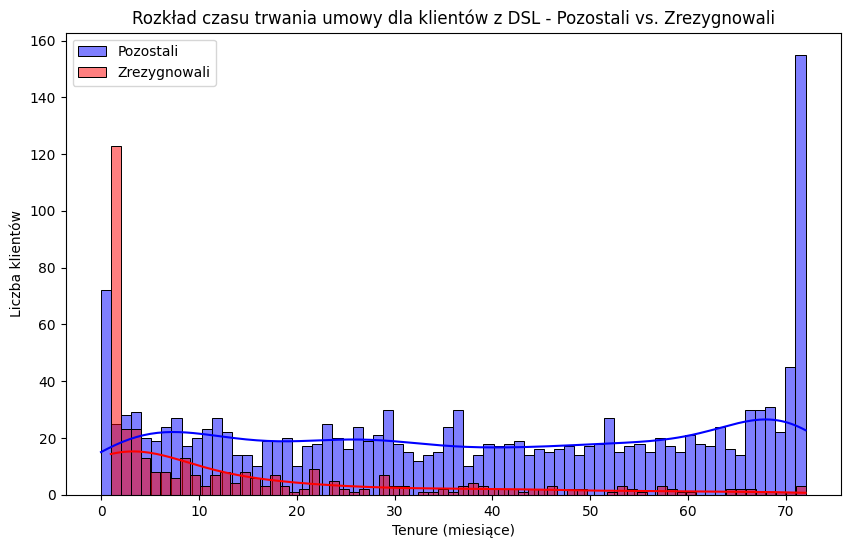

In [ ]:
# Histogram DSL
plt.figure(figsize=(10, 6))

# Histogram dla klientów z DSL, którzy pozostali
sns.histplot(data=dataset[dataset['InternetService_DSL'] == 1][dataset['Churn'] == 0],
             x='tenure', bins=70, kde=True, color='blue', label='Pozostali')

# Histogram dla klientów z DSL, którzy zrezygnowali
sns.histplot(data=dataset[dataset['InternetService_DSL'] == 1][dataset['Churn'] == 1],
             x='tenure', bins=70, kde=True, color='red', label='Zrezygnowali')

plt.xlabel('Tenure (miesiące)')
plt.ylabel('Liczba klientów')
plt.title('Rozkład czasu trwania umowy dla klientów z DSL - Pozostali vs. Zrezygnowali')
plt.legend()
plt.show()

Tutaj również najwięcej klientów rezygnuje zaraz na początku umowy, ale w odróznieniu od Fiber Optic klienci w kolejnych miesiącach są bardziej "lojalni" i mniejszy procent decyduje się na zmianę dostawcy usług

pca zrobic, scatterplot

## Report

Write down what you tried in this section. Include your observations, hypothesis, things you are not sure about, ideas for experiments that could be worth trying. You are encouraged to use graphs/tables/pieces of code. You can create new code and text cells. Take a look [here](https://www.markdownguide.org/cheat-sheet/) to improve the quality of your report.

Things to consider in this section:
- Statistics
- Distributions
- Correlation matrix
- Principal Component Analysis

# Feature extraction

## Code

Train/test split

In [ ]:
# Your code should start here

from sklearn.model_selection import train_test_split

trainable_dataset = dataset.drop(columns=['Churn'])

labels = dataset['Churn'].copy()

X_train, X_test, y_train, y_test = train_test_split(trainable_dataset, labels, test_size=0.2, random_state=42)

# Your code should end here

Normalization/Standarization

In [ ]:
# Your code should start here
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

queries = scaler.fit_transform(queries)

# Your code should end here

PCA

In [ ]:
# Your code should start here

from sklearn.decomposition import PCA
pca = PCA(n_components=10)
# variance explained ratio
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Your code should end here

## Report

Write down what you tried in this section. Include your observations, hypothesis, things you are not sure about, ideas for experiments that could be worth trying. You are encouraged to use graphs/tables/pieces of code. You can create new code and text cells. Take a look [here](https://www.markdownguide.org/cheat-sheet/) to improve the quality of your report.

Things to consider in this section:
- Normalization/Standardization
- Transformations
- Feature importance
- PCA

# Training

## Code

### RandomForrestClassifier

Model implementation

In [ ]:
# Your code should start here

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(n_estimators=16, random_state=42)

rfc.fit(X_train, y_train)

rfc_predicted_train = rfc.predict(X_train)

rfc_predicted_test = rfc.predict(X_test)

print("X_train predction:", accuracy_score(y_train, rfc_predicted_train))
print("X_test prediction:", accuracy_score(y_test, rfc_predicted_test))

# Your code should end here

X_train predction: 0.9920124251164855
X_test prediction: 0.7976929902395741


Feature importance

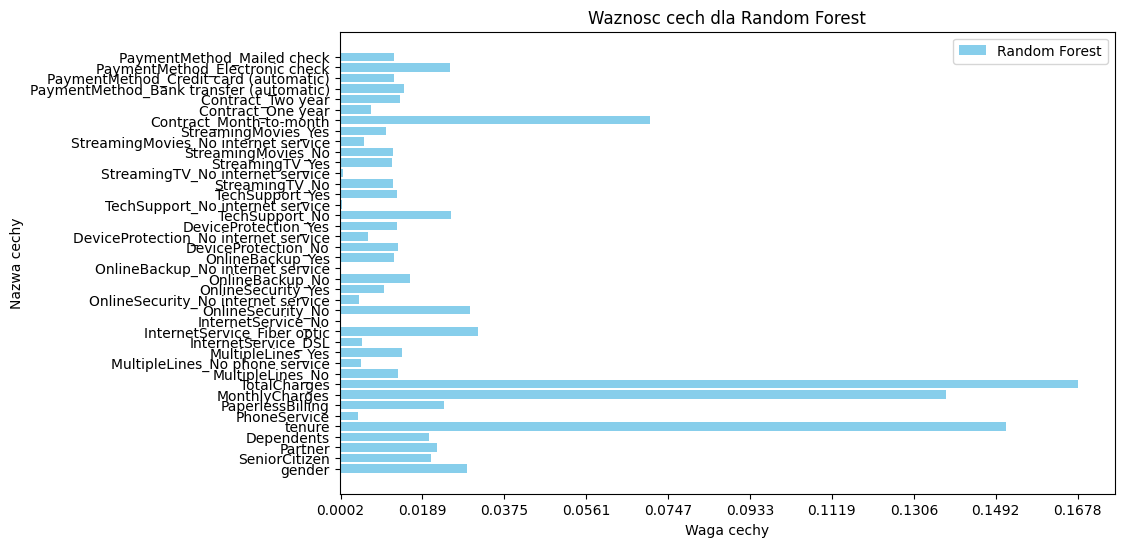

In [ ]:
# Your code should start here

importances_rfc = rfc.feature_importances_

feature_names = trainable_dataset.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances_rfc, label='Random Forest', color='skyblue')
plt.xlabel('Waga cechy')
plt.ylabel('Nazwa cechy')
plt.title('Waznosc cech dla Random Forest')
plt.xticks(np.linspace(min(importances_rfc), max(importances_rfc), num=10))  # np.linspace tworzy 10 równych wartości
plt.legend()
plt.show()

# Your code should end here

Widzimy, że najważniejszą cechą dla naszego drzewa jest cecha "Total charges", która jest ważną cechą ujemnie skorelowaną (im więcej ktoś wydał na usługi tym mniejsza szansa na to, że odejdzie), ale nie pokrywa się z naszymi obserwacjami wynikającymi z macierzy korelacji (nie jest to najważniejsza cecha).

MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100, 50),
                    activation='logistic',
                    max_iter=1000,
                    random_state=42)

mlp.fit(X_train, y_train)

mlp_predicted_train = mlp.predict(X_train)
mlp_predicted_test = mlp.predict(X_test)

print("X_train prediction:", accuracy_score(y_train, mlp_predicted_train))
print("X_test prediction:", accuracy_score(y_test, mlp_predicted_test))

X_train prediction: 0.9429775904149101
X_test prediction: 0.7559893522626442


Keras NN (Neural Networks)

In [ ]:
# Your code should start here

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input

model = Sequential()

model.add(Input(shape=(X_train.shape[1], )))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

# Your code should end here

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,617 (61.00 KB)

 Trainable params: 15,617 (61.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
my_validation_data = (X_test, y_test)
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=my_validation_data, verbose=1)

Epoch 1/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6174 - loss: 0.6468 - val_accuracy: 0.8128 - val_loss: 0.4162
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7776 - loss: 0.4589 - val_accuracy: 0.7995 - val_loss: 0.4095
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7948 - loss: 0.4435 - val_accuracy: 0.8004 - val_loss: 0.4201
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7944 - loss: 0.4374 - val_accuracy: 0.8004 - val_loss: 0.4018
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7895 - loss: 0.4436 - val_accuracy: 0.8012 - val_loss: 0.4019
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7941 - loss: 0.4335 - val_accuracy: 0.8057 - val_loss: 0.4139
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7931 - loss: 0.4300 - val_accuracy: 0.8083 - val_loss: 0.4077
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7947 - loss: 0.4229 - val_accu

Results

In [ ]:
X_train_model_seq = model.predict(X_train)
X_test_model_seq = model.predict(X_test)

X_train_preds = (X_train_model_seq > 0.5).astype(int)
X_test_preds = (X_test_model_seq > 0.5).astype(int)

print(accuracy_score(X_train_preds, y_train))
print(accuracy_score(X_test_preds, y_test))

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
0.9085866429997781
0.7843833185448092


Plot learning hisotry of our model

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.io as pio
pio.renderers.default = 'colab'

def plot_learning_history(model, epochs_num=None):
    if epochs_num:
        x = np.arange(epochs_num)
    else:
        x = None
    history = model.history.history

    try:
        hist = [
            go.Scatter(x=x, y=history["accuracy"], name="Train Accuracy", marker=dict(size=5), yaxis='y2'),
            go.Scatter(x=x, y=history["val_accuracy"], name="Test Accuracy", marker=dict(size=5), yaxis='y2'),
            go.Scatter(x=x, y=history["loss"], name="Train Loss", marker=dict(size=5)),
            go.Scatter(x=x, y=history["val_loss"], name="Test Loss", marker=dict(size=5))
        ]
    except:
        hist = [
            go.Scatter(x=x, y=history["acc"], name="Train Accuracy", marker=dict(size=5), yaxis='y2'),
            go.Scatter(x=x, y=history["val_acc"], name="Test Accuracy", marker=dict(size=5), yaxis='y2'),
            go.Scatter(x=x, y=history["loss"], name="Train Loss", marker=dict(size=5)),
            go.Scatter(x=x, y=history["val_loss"], name="Test Loss", marker=dict(size=5))
        ]

    layout = go.Layout(
        title="Model Training Evolution", font=dict(family='Palatino'), xaxis=dict(title='Epoch', dtick=1),
        yaxis1=dict(title="Loss", domain=[0, 0.45]), yaxis2=dict(title="Accuracy", domain=[0.55, 1]),
    )
    py.iplot(go.Figure(data=hist, layout=layout))

plot_learning_history(model)

KeyError: 'acc'

## Report

Write down what you tried in this section. Include your observations, hypothesis, things you are not sure about, ideas for experiments that could be worth trying. You are encouraged to use graphs/tables/pieces of code. You can create new code and text cells. Take a look [here](https://www.markdownguide.org/cheat-sheet/) to improve the quality of your report.

Things to consider in this section:
- Model
- Hyperparameters

# Validation

## Code

Confusion matrix for rfc

Text(0.5, 1.0, 'Test')

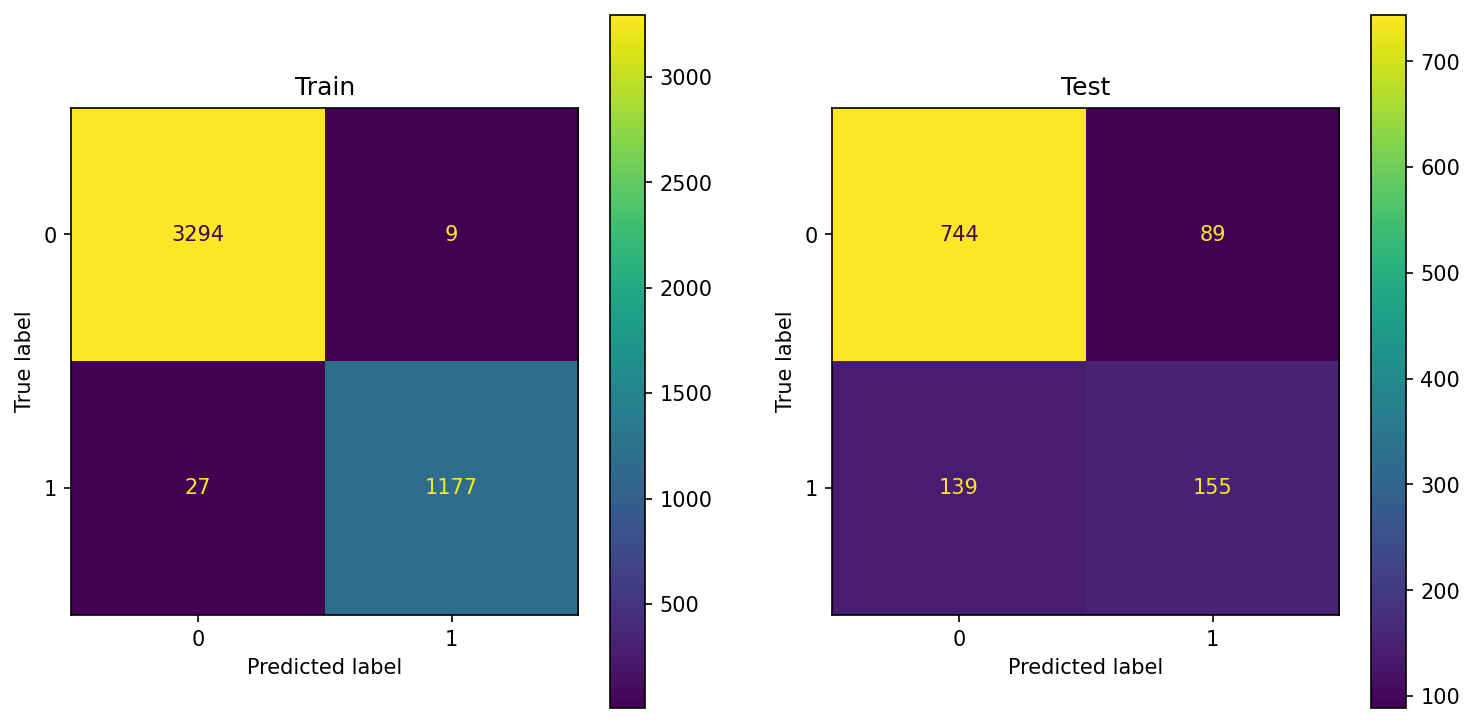

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X_train_cm = confusion_matrix(y_train, rfc_predicted_train)
X_test_cm = confusion_matrix(y_test, rfc_predicted_test)

X_train_disp_cm = ConfusionMatrixDisplay(confusion_matrix=X_train_cm)
X_test_disp_cm = ConfusionMatrixDisplay(confusion_matrix=X_test_cm)

fig, ax = plt.subplots(1, 2, figsize=(12, 6), dpi=150)

X_train_disp_cm.plot(ax=ax[0])
ax[0].set_title('Train')

X_test_disp_cm.plot(ax=ax[1])
ax[1].set_title('Test')

Validation: precision and recall
sprawdzamy jak TP (True positive - dobrze trafione pozytywne predykcje) mają się do wszystkich przewidzianych pozytywnych predykcji zarówno dobrych (TP) jak i tych złych (FP - False positive - zle przewidziane wartości pozytywne)

wzór: TP/(TP+FP)

Użyje to tego gotowej funkcji: precision_score

In [ ]:
from sklearn.metrics import precision_score

precision_train = precision_score(y_train, rfc_predicted_train)
precision_test = precision_score(y_test, rfc_predicted_test)

print("Train precision:", precision_train)
print("Test precision:", precision_test)

Train precision: 0.9924114671163575
Test precision: 0.6352459016393442


Validation: recall
sprawdzamy jak TP ma się do przewidzianych wartości

wzór: TP/(TP+FN)

Uzyje to tego funkcji: recall_score

In [ ]:
from sklearn.metrics import recall_score

recall_train = recall_score(y_train, rfc_predicted_train)
recall_test = recall_score(y_test, rfc_predicted_test)

print("Train recall:", recall_train)
print("Test recall:", recall_test)

Train recall: 0.9775747508305648
Test recall: 0.5272108843537415


Precision-recall curve

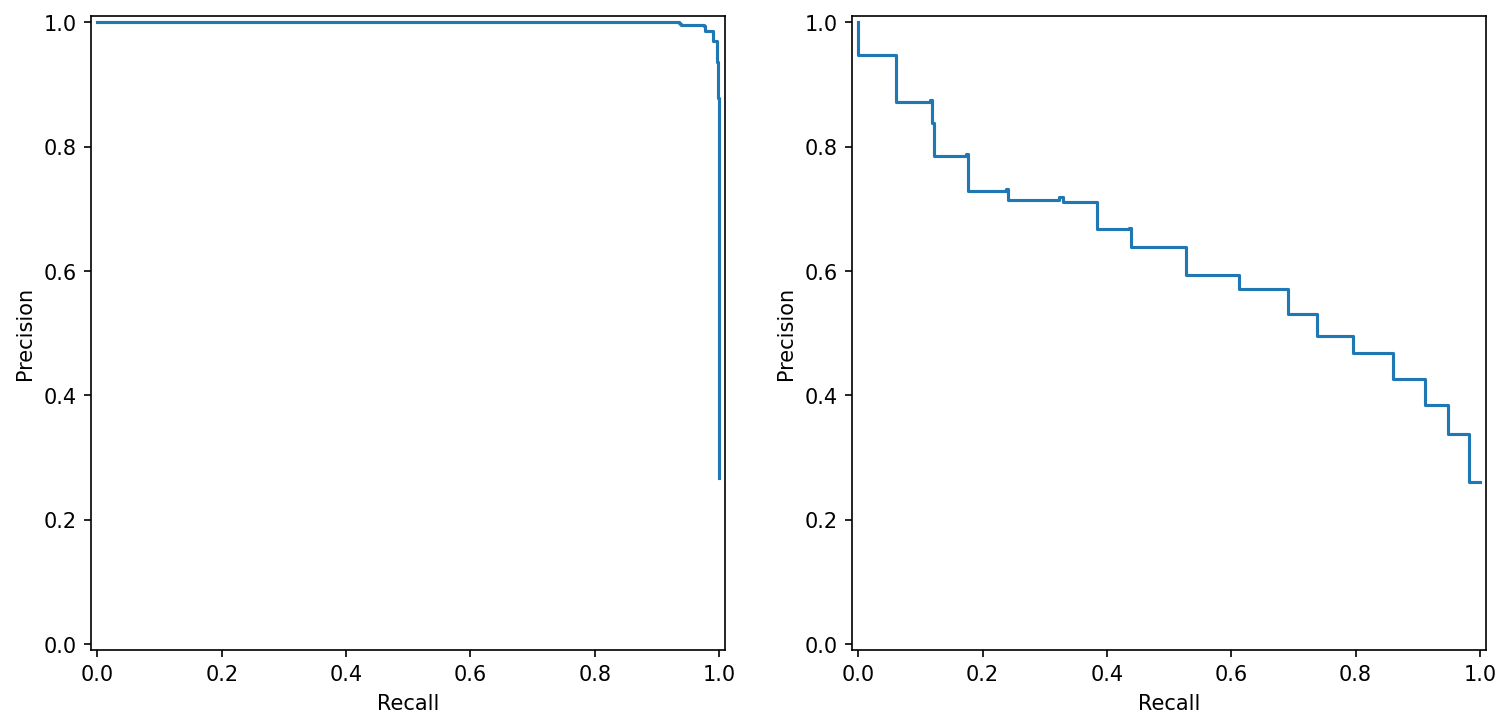

In [ ]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

train_scores = rfc.predict_proba(X_train)[:, 1]
test_scores = rfc.predict_proba(X_test)[:, 1]

train_precision, train_recall, _ = precision_recall_curve(y_train, train_scores)
test_precision, test_recall, _ = precision_recall_curve(y_test, test_scores)

train_curve_disp = PrecisionRecallDisplay(precision=train_precision, recall=train_recall)
test_curve_disp = PrecisionRecallDisplay(precision=test_precision, recall=test_recall)

fig, ax = plt.subplots(1, 2, figsize=(12, 6), dpi=150)
train_curve_disp.plot(ax=ax[0])
test_curve_disp.plot(ax=ax[1])

ROC AUC

In [ ]:
from sklearn.metrics import roc_auc_score

train_roc_auc = roc_auc_score(y_train, train_scores)
test_roc_auc = roc_auc_score(y_test, test_scores)

print("Train ROC AUC:", train_roc_auc)
print("Test ROC AUC:", test_roc_auc)

Train ROC AUC: 0.9997480393843109
Test ROC AUC: 0.8372410188565222


Cross-validation

In [ ]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(rfc, X_train, y_train, cv=5, scoring='accuracy', return_train_score=True)

cv_scores = cv_results['test_score']

print('Results of CV:', cv_scores)
print('Mean result of CV:', np.mean(cv_scores))

Results of CV: [0.77050998 0.78492239 0.76137625 0.7791343  0.76914539]
Mean result of CV: 0.7730176620704761


## Report

Write down what you tried in this section. Include your observations, hypothesis, things you are not sure about, ideas for experiments that could be worth trying. You are encouraged to use graphs/tables/pieces of code. You can create new code and text cells. Take a look [here](https://www.markdownguide.org/cheat-sheet/) to improve the quality of your report.

Things to consider in this section:
- Data splitting
- Metric
- Cross-validation

# Prediction saving

Take extra care and make sure to save the predictions as a *CSV* file with the *Score* and the *Churn* columns. Your file should match the following format from the next cells.

In [ ]:
test_predictions = pd.DataFrame(
    dict(
        Score=model.predict(queries).flatten(),
        Label=(model.predict(queries).flatten() > 0.5).astype(int)  # Poprawne użycie Score
        )
    )

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
display(test_predictions.head(100))

,Score,Label
0,0.000579,0
1,0.063100,0
2,0.213901,0
3,0.231972,0
4,0.000037,0
...,...,...
95,0.480354,0
96,0.199673,0
97,0.112751,0
98,0.076356,0


In [ ]:
test_predictions.to_csv('./test_predictions.csv')